# Introducción y Objetivos

# Clases

In [2]:
class MammographyDataset:
    def __init__(self, data_path):
        self.data_path = data_path
        self.images = []
        self.labels = []
        self.feature_dictionary = {
            'label': tf.io.FixedLenFeature([], tf.int64),
            'label_normal': tf.io.FixedLenFeature([], tf.int64),
            'image': tf.io.FixedLenFeature([], tf.string)
        }

    def _parse_function(self, example):
        parsed_example = tf.io.parse_single_example(example, self.feature_dictionary)
        return parsed_example

    def read_data(self,filename):
        full_dataset = tf.data.TFRecordDataset(filename,num_parallel_reads=tf.data.experimental.AUTOTUNE)
        full_dataset = full_dataset.shuffle(buffer_size=31000)
        full_dataset = full_dataset.cache()
        print (f"File: {filename}")
        print("Cantidad de registros: ", len(list(full_dataset)))

        full_dataset = full_dataset.map(self._parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
        
        for image_features in full_dataset:
            image = tf.io.decode_raw(image_features['image'], tf.uint8)
            image = tf.reshape(image, [299, 299])
            image = image.numpy()
            image = cv2.merge([image, image, image])
            image = image / 255.0
            self.images.append(image)
            self.labels.append(image_features['label_normal'].numpy())           

    def show_top_6(self, images, labels):
        fig, axes = plt.subplots(2, 3, figsize=(10, 7))
        axes = axes.flatten()
        for i in range(min(len(images), 6)):  
            axes[i].imshow(images[i], cmap='gray')
            axes[i].set_title(f"Label: {labels[i]}")
            axes[i].axis('off')        
        plt.tight_layout()
        plt.show()
        

# Imports

In [3]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Carga y Exploración del Dataset

In [6]:
data_path = r"C:\Users\-MSI-\Desktop\archive"

filenames = [
    os.path.join(data_path, "training10_0", "training10_0.tfrecords"),
    os.path.join(data_path, "training10_1", "training10_1.tfrecords"),
    os.path.join(data_path, "training10_2", "training10_2.tfrecords"),
    os.path.join(data_path, "training10_3", "training10_3.tfrecords"),
    os.path.join(data_path, "training10_4", "training10_4.tfrecords")
]

dataset = MammographyDataset(data_path)

for file in filenames:
    dataset.read_data(file)

File: C:\Users\-MSI-\Desktop\archive\training10_0\training10_0.tfrecords
Cantidad de registros:  11177
File: C:\Users\-MSI-\Desktop\archive\training10_1\training10_1.tfrecords
Cantidad de registros:  11177
File: C:\Users\-MSI-\Desktop\archive\training10_2\training10_2.tfrecords
Cantidad de registros:  11177
File: C:\Users\-MSI-\Desktop\archive\training10_3\training10_3.tfrecords
Cantidad de registros:  11177
File: C:\Users\-MSI-\Desktop\archive\training10_4\training10_4.tfrecords
Cantidad de registros:  11177


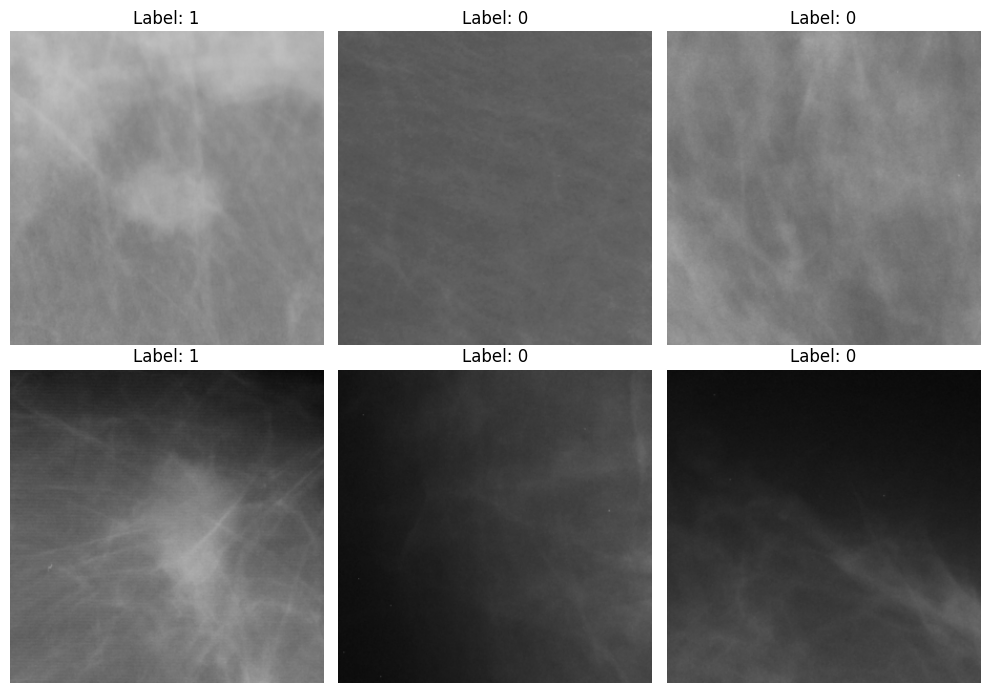

Total images loaded: 55885
Total labels loaded: 55885


In [7]:
dataset.show_top_6(dataset.images, dataset.labels)
print("Total images loaded:", len(dataset.images))
print("Total labels loaded:", len(dataset.labels))

# Preprocesamiento de Imágenes

# Construcción y Entrenamiento del Modelo Tradicional

# Construcción y Entrenamiento del Modelo de Deep Learning

# Evaluación de los Modelos

# Conclusiones y Trabajo Futuro